In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [3]:
## Create State
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [4]:
## Envoirmet variables setup
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")



In [6]:
from langchain_openai import ChatOpenAI

llm=ChatOpenAI(model="gpt-4o-mini",temperature=0)
llm.invoke("Hello, how are you?")


AIMessage(content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b547601dbd', 'id': 'chatcmpl-CiObbmet1XlEj9YTR5oVjWRHSdBCR', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--c82ea8da-8508-4b7a-91d9-6bf9470c90e9-0', usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model_name="openai/gpt-oss-20b",api_key=os.getenv("GROQ_API_KEY"))
llm_groq.invoke("Hello, how are you?")

AIMessage(content='Hello! I’m doing great—thanks for asking. How about you? Anything interesting on your mind today?', additional_kwargs={'reasoning_content': 'The user says: "Hello, how are you?" It\'s a greeting. We respond politely. Probably also ask how they are.'}, response_metadata={'token_usage': {'completion_tokens': 58, 'prompt_tokens': 77, 'total_tokens': 135, 'completion_time': 0.057731549, 'completion_tokens_details': {'reasoning_tokens': 27}, 'prompt_time': 0.003668079, 'prompt_tokens_details': None, 'queue_time': 0.004847822, 'total_time': 0.061399628}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_75c733514d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--716810f6-7d5b-48c3-a347-c540ef630dee-0', usage_metadata={'input_tokens': 77, 'output_tokens': 58, 'total_tokens': 135, 'output_token_details': {'reasoning': 27}})

In [10]:
def supperbot(state:State):
    return {"messages": [llm_groq.invoke(state["messages"])]}

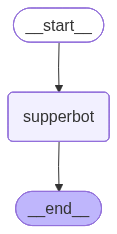

In [12]:
from IPython.display import Image, display
graph=StateGraph(State)
graph.add_node("supperbot",supperbot)
graph.add_edge(START, "supperbot")
graph.add_edge("supperbot", END)

graph_builder=graph.compile()

#Display the graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [18]:
# invocation 
graph_builder.invoke({"messages": "Hi My name is John. I like a python programming!"})
graph_builder.invoke({"messages": "Hi My name is John. I like also a javascript programming!"})

{'messages': [HumanMessage(content='Hi My name is John. I like also a javascript programming!', additional_kwargs={}, response_metadata={}, id='bd02230a-93a9-4871-9b97-8045724d1698'),
  AIMessage(content='Hey John! 👋  \nNice to meet you. JavaScript is such a versatile language—what kind of projects are you working on or hoping to build? Whether you’re just getting started with the basics, exploring front‑end frameworks (React, Vue, Angular), or diving into Node.js and back‑end stuff, I’m here to help. If you have a specific question or a piece of code you’re stuck on, feel free to share!', additional_kwargs={'reasoning_content': 'The user says: "Hi My name is John. I like also a javascript programming!" They mention they like JavaScript programming. We need to respond politely, maybe ask about their JavaScript projects. They are probably a beginner or intermediate. The user hasn\'t asked a question. We should greet and ask if they need help with JavaScript. Also we can suggest resource

### Striming the responses

In [17]:
for chunk in graph_builder.stream({"messages":"Hi My name is John. I like a python programming!"},stream_mode="values"):
    print(chunk)






{'messages': [HumanMessage(content='Hi My name is John. I like a python programming!', additional_kwargs={}, response_metadata={}, id='f73087fb-3c84-4000-a64f-a5395a3e3ce1')]}
{'messages': [HumanMessage(content='Hi My name is John. I like a python programming!', additional_kwargs={}, response_metadata={}, id='f73087fb-3c84-4000-a64f-a5395a3e3ce1'), AIMessage(content='Hey John! 👋 Great to meet you. Python’s a fun language—what kind of projects do you enjoy working on? Are you into web development, data science, automation, or something else? Let me know, and we can dive into some cool ideas or help with any code questions you have!', additional_kwargs={'reasoning_content': 'User says: "Hi My name is John. I like a python programming!" They are greeting, telling name. Should respond politely, ask about python interest. Use friendly tone.'}, response_metadata={'token_usage': {'completion_tokens': 108, 'prompt_tokens': 83, 'total_tokens': 191, 'completion_time': 0.12359738, 'completion_tok